<a href="https://colab.research.google.com/github/Tasha-Tut/Python_Laba/blob/dev/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()
data['items']

[{'id': '71556162',
  'premium': False,
  'name': 'Физик-ядерщик',
  'department': None,
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': {'from': 110000, 'to': None, 'currency': 'RUR', 'gross': False},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': {'city': None,
   'street': None,
   'building': None,
   'lat': None,
   'lng': None,
   'description': None,
   'raw': 'Москва, ул. Введенского, д. 1, м. Калужская',
   'metro': None,
   'metro_stations': [],
   'id': '170835'},
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2023-04-20T14:47:53+0300',
  'created_at': '2023-04-20T14:47:53+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=71556162',
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/71556162?host=hh.ru',
  'adv_response_url': None,
  'alternate_url': 'https://hh.ru/vaca

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
import requests
from time import sleep

lst = ['Танцор', 'Заместитель директора атракционов', 'Преподаватель по базовой математике', 'Охранник (строительная площадка)', 'Повар-кондитер универсал']
vacancies = []
for i in range (5) :
  print(f'Вакансии по специальностям: {lst[i]}')
  URL = 'https://api.hh.ru/vacancies'
  params = {
    'text': lst[i],
    'area': 1,
    'page': 0,
    'per_page': 10
  }
  data = requests.get(URL, params).json()
  sleep(1)
  pages = data['pages']
  for _ in range(pages) :
    for it in data['items'] :
      vacancies.append(it)
      print(it['name'])
    params['page'] += 1
    data = requests.get(URL, params).json()
    sleep(1)



Вакансии по специальностям: Танцор
Промоутер - организатор в ночной клуб
Артист балета
Танцор в Китае
Администратор-менеджер в школу танцев для всей семьи TOPSTAR
Танцор уличных направлений
Бариста
Администратор
Танцовщица / танцовщик
Танцор
Брокер по продаже элитной недвижимости
Риэлтор (стажёр)
Начинающий специалист
Вакансии по специальностям: Заместитель директора атракционов
Управляющий сетью парков аттракционов
Управляющий прокатами
Вакансии по специальностям: Преподаватель по базовой математике
Педагог-дефектолог 1 класса в частную школу
Учитель математики в русскую школу на Бали
Координатор образовательных проектов (ИТ)
Продуктовый аналитик данных в Учебник
Преподаватель по базовой математике ЕГЭ
Учитель информатики и математики
Учитель математики
Репетитор по географии
Доцент Департамента анализа данных и машинного обучения
Учитель начальных классов
Учитель начальных классов в частную школу
Преподаватель по математике в онлайн-школу
Вакансии по специальностям: Охранник (строите

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
print(f"Найдено {len(vacancies)} вакансий")

Найдено 51 вакансий


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = []
for vacancy in vacancies:
    name = vacancy['employer']['name']
    if 'lat' in vacancy['employer'] and 'lon' in vacancy['employer']:
        latitude = vacancy['employer']['lat']
        longitude = vacancy['employer']['lon']
        company = Company(name, latitude, longitude)
    else:
        company = Company(name, None, None)
    companies.append(company)

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
counter = 0
for elem in vacancies :
  try :
    a = (elem['address']['lat'])
    counter += 1
  except :
    pass
print(f'Количество вакансий с пустыми координатами: {counter}')

Количество вакансий с пустыми координатами: 35


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
import math

# координаты Москвы
moscow_lat = 55.752917
moscow_lon = 37.620770

# радиус сферы в километрах
radius = 25

# функция, которая вычисляет расстояние между двумя точками в километрах
def distance(lat1, lon1, lat2, lon2):
    radius_earth = 6371  # радиус Земли в километрах
    d_lat = math.radians(lat2 - lat1)
    d_lon = math.radians(lon2 - lon1)
    a = math.sin(d_lat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return radius_earth * c

# отбираем вакансии, которые находятся в пределах МКАД
mkad_vacancies = []
moscow_lat, moscow_lon = 55.752917, 37.620770
radius = 25

for vacancy in vacancies:
    if 'lat' in vacancy['employer']:
        lat = vacancy['address']['lat']
        lon = vacancy['address']['lon']
        if distance(moscow_lat, moscow_lon, lat, lon) > radius:
          mkad_vacancies.append(vacancy)

print(f'Количество вакансий в пределах МКАД: {len(mkad_vacancies)}')


Количество вакансий в пределах МКАД: 0


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 209MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
print(diamonds.head(5))

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
num_diamonds = diamonds.shape[0]
print("Количество бриллиантов:", num_diamonds)

Количество бриллиантов: 219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
print(diamonds['total_sales_price'].idxmax(), " - ", diamonds['total_sales_price'].max())
print(diamonds['total_sales_price'].idxmin(), " - ", diamonds['total_sales_price'].min())


219702  -  1449881
0  -  200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
print("Количество пропусков:", diamonds.isin([None, 'unknown']).sum().sum())

Количество пропусков: 1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
diamonds.replace(["unknown", "None"], pd.NA, inplace=True)
missing_values = diamonds.isna().sum()
cols_with_missing_values = missing_values[missing_values > 0].index.tolist()
print(cols_with_missing_values)


['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
all_cols = diamonds.columns.tolist()
special_cols = [col for col in all_cols if col.startswith("fancy_color_") or col.startswith("fluor_")]
print(len(special_cols))


6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
special_cols = [col for col in diamonds.columns if col.startswith("fancy_color_") or col.startswith("fluor_")]
info_count = 0
for col in special_cols:
    info_count += diamonds[col].count()
print(info_count)


111586


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
for col in diamonds.columns:
    if col.startswith('fancy_color_') or col.startswith('fluor_'):
        diamonds.drop(col, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
for col in diamonds.columns.values.tolist () :
  if col.startswith('culet_') :
    diamonds.drop(columns = [col],axis = 1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
total_price = diamonds['total_sales_price'].sum() / 1000
print(f"Суммарная стоимость всех бриллиантов: {total_price} тыс. долларов")

Суммарная стоимость всех бриллиантов: 1517721.991 тыс. долларов


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
for i in range(0, diamonds.shape[0], 2):
  print(diamonds.iloc[[i]])
  if i > 5000: # убрав последние 2 строчки выведутся все нужные строки(их очень много)
    break

Streaming output truncated to the last 5000 lines.

      meas_length  meas_width  meas_depth girdle_min girdle_max  \
4094         4.25        4.27        2.67       <NA>       <NA>   

      total_sales_price  
4094                520  
      Unnamed: 0    cut color clarity  carat_weight cut_quality  lab  \
4096        4096  Round     K     VS2           0.3   Excellent  GIA   

       symmetry     polish eye_clean  depth_percent  table_percent  \
4096  Excellent  Excellent       Yes           62.8           57.0   

      meas_length  meas_width  meas_depth girdle_min girdle_max  \
4096         4.26        4.28        2.68          M        STK   

      total_sales_price  
4096                520  
      Unnamed: 0   cut color clarity  carat_weight cut_quality  lab  \
4098        4098  Pear     J    VVS1          0.31        <NA>  GIA   

       symmetry     polish eye_clean  depth_percent  table_percent  \
4098  Very Good  Very Good      <NA>           63.9           56.0   

    

(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
for i in range(0, diamonds.shape[0], 6):
  print(diamonds.iloc[[i]])
  if i > 10000: # убрав последние 2 строчки выведутся все нужные строки(их очень много)
    break

Streaming output truncated to the last 5000 lines.

      meas_length  meas_width  meas_depth girdle_min girdle_max  \
7278         5.53        3.65        2.42       <NA>       <NA>   

      total_sales_price  
7278                612  
      Unnamed: 0       cut color clarity  carat_weight cut_quality  lab  \
7284        7284  Princess     D     SI1           0.3        <NA>  GIA   

       symmetry     polish eye_clean  depth_percent  table_percent  \
7284  Very Good  Excellent      <NA>           72.3           72.0   

      meas_length  meas_width  meas_depth girdle_min girdle_max  \
7284         3.62        3.53        2.55         TK        VTK   

      total_sales_price  
7284                612  
      Unnamed: 0    cut color clarity  carat_weight cut_quality  lab  \
7290        7290  Round     K     VS1           0.3   Very Good  GIA   

       symmetry     polish eye_clean  depth_percent  table_percent  \
7290  Very Good  Very Good       Yes           61.1           56.0 

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
cat_columns = diamonds.select_dtypes(include='object')
diamonds_cat = diamonds.select_dtypes(include='object')
print(diamonds_cat)


             cut color clarity cut_quality  lab   symmetry     polish  \
0          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
1          Round     E    VVS2   Very Good  IGI  Very Good  Very Good   
2          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
3          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
4          Round     E    VVS2   Very Good  IGI  Very Good  Excellent   
...          ...   ...     ...         ...  ...        ...        ...   
219698     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219699   Radiant  <NA>     VS2        <NA>  GIA  Very Good  Very Good   
219700     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219701  Princess  <NA>     SI2        <NA>  GIA       Good       Good   
219702      Pear  <NA>    VVS2        <NA>  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0           <NA>          M          M  
1           <NA>        STK        STK  


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
price = diamonds['total_sales_price']
price_matrix = price * price.transpose()
print(price_matrix)


0                 40000
1                 40000
2                 40000
3                 40000
4                 40000
              ...      
219698    1465775118864
219699    1670556250000
219700    1730529726016
219701    1822500000000
219702    2102154914161
Name: total_sales_price, Length: 219703, dtype: int64


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

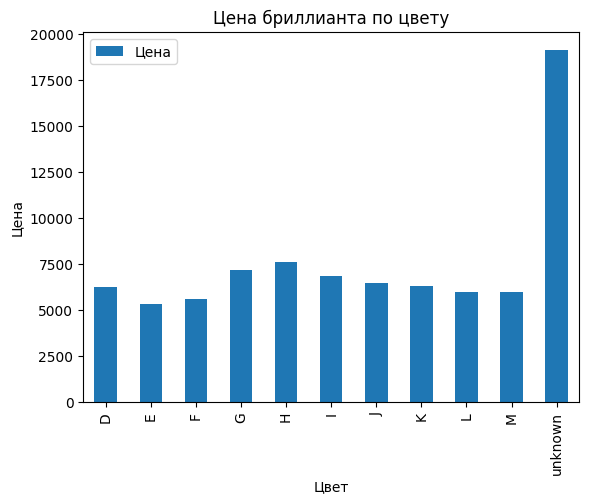

In [ ]:
import matplotlib.pyplot as plt

diamonds_cleaned = diamonds.dropna(subset=['color', 'total_sales_price'])
diamonds_cleaned.groupby('color')['total_sales_price'].mean().plot(kind='bar')
plt.title('Цена бриллианта по цвету')
plt.xlabel('Цвет')
plt.ylabel('Цена')
plt.legend(['Цена'])
plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

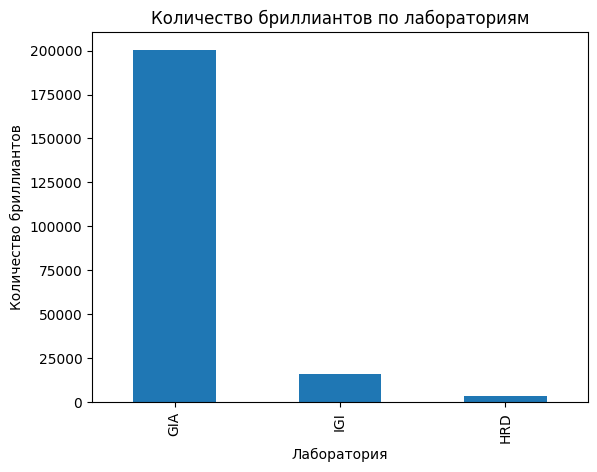

In [ ]:
import matplotlib.pyplot as plt

counts = diamonds['lab'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Лаборатория')
plt.ylabel('Количество бриллиантов')
plt.title('Количество бриллиантов по лабораториям')
plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

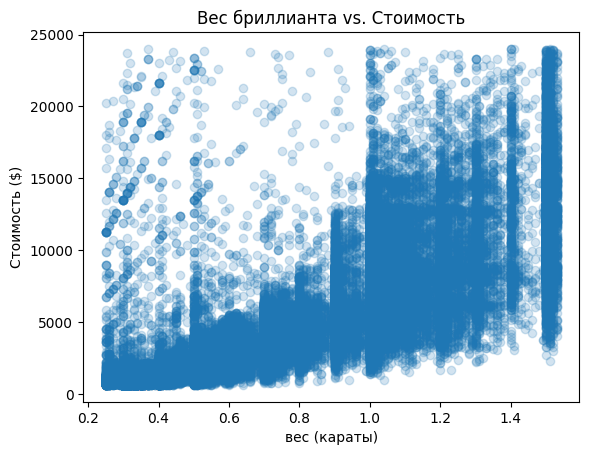

In [ ]:
import matplotlib.pyplot as plt

df_cleaned = diamonds.dropna(subset=['carat_weight', 'total_sales_price'])
df_cleaned = df_cleaned[df_cleaned['total_sales_price'].between(df_cleaned['total_sales_price'].quantile(.05), df_cleaned['total_sales_price'].quantile(.95))]
df_cleaned = df_cleaned[df_cleaned['carat_weight'].between(df_cleaned['carat_weight'].quantile(.05), df_cleaned['carat_weight'].quantile(.95))]

plt.scatter(df_cleaned['carat_weight'], df_cleaned['total_sales_price'], alpha=0.2)
plt.xlabel('вес (караты)')
plt.ylabel('Стоимость ($)')
plt.title('Вес бриллианта vs. Стоимость')
plt.show()


(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

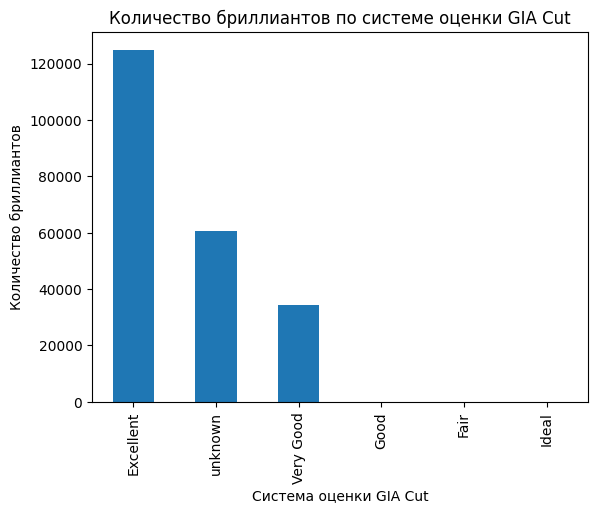

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diamonds.csv')
count_by_cut = diamonds['cut_quality'].value_counts()

count_by_cut.plot.bar()
plt.title('Количество бриллиантов по системе оценки GIA Cut')
plt.xlabel('Система оценки GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Не беря во внимание значение unknown имеем следующие выводы:
- Самые догорие бриллианты имеют цвет H, сразу за ним располагается цвет G;
- Наибольшее количество бриллиантов принадлежит лаборатории GIA;
- Чем больше вес, тем дороже бриллиант;
- Бриллиантов оценненых как 'Exelent' и 'Very Good' много больше, чем 'Good',
'Fair', 'Indeal';

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
import pandas as pd
diamonds = pd.read_csv('https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU')
new_df = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']].copy()
print(new_df.head(10))


   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
shuffled_df = new_df.sample(frac=1, random_state=42)
print(shuffled_df.head(10))


        meas_length  meas_width  meas_depth  total_sales_price
167888         7.64        5.67        3.60               5376
53087          4.37        4.40        2.71                940
168078         8.02        4.59        2.73               5400
194939         6.59        6.63        3.90              12893
58943          4.72        4.74        2.94                974
171027         5.47        5.47        3.96               6056
35317          4.27        4.30        2.58                832
114019         4.88        4.96        3.14               2184
20222          4.27        4.29        2.67                732
39535          4.26        4.30        2.64                880


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
import numpy as np
new_df['minkowski_sum'] = new_df.apply(lambda row: np.sum(row[['meas_length', 'meas_width', 'meas_depth']] ** 3) ** (1/3), axis=1)
print(new_df.head(10))


   meas_length  meas_width  meas_depth  total_sales_price  minkowski_sum
0         2.85        2.87        1.79                200       3.745015
1         2.84        2.89        1.78                200       3.748797
2         2.88        2.90        1.77                200       3.775608
3         2.86        2.88        1.78                200       3.754425
4         2.79        2.83        1.82                200       3.694108
5         2.95        2.99        1.81                200       3.878271
6         2.85        2.88        1.84                200       3.762571
7         2.86        2.89        1.78                200       3.760321
8         2.89        2.92        1.85                200       3.811376
9         2.83        2.87        1.80                200       3.735788


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
new_df2 = new_df.loc[:, ['minkowski_sum', 'total_sales_price']]
print(new_df2.head(10))


   minkowski_sum  total_sales_price
0       3.745015                200
1       3.748797                200
2       3.775608                200
3       3.754425                200
4       3.694108                200
5       3.878271                200
6       3.762571                200
7       3.760321                200
8       3.811376                200
9       3.735788                200


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(new_df2, test_size=0.2, random_state=42)

print("размер тренировочной выборки:", train_df.shape)
print("размер тествой выборки:", test_df.shape)


размер тренировочной выборки: (175762, 2)
размер тествой выборки: (43941, 2)


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

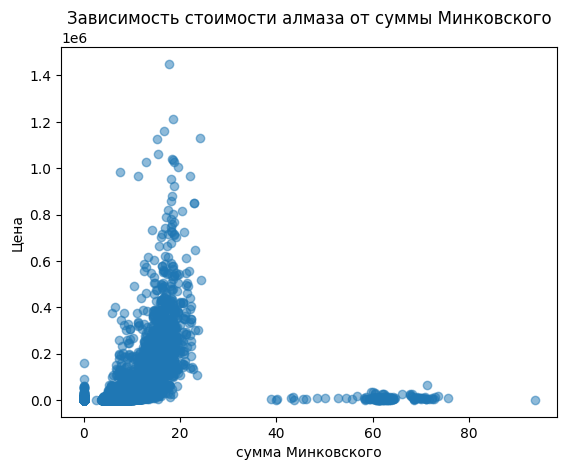

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], alpha=0.5)

plt.xlabel('сумма Минковского')
plt.ylabel('Цена')
plt.title('Зависимость стоимости алмаза от суммы Минковского')
plt.show()


(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

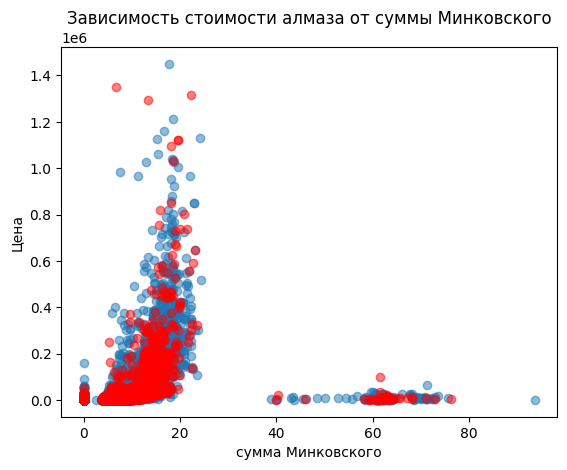

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], alpha=0.5)

plt.xlabel('сумма Минковского')
plt.ylabel('Цена')
plt.title('Зависимость стоимости алмаза от суммы Минковского')
plt.scatter(test_df['minkowski_sum'], test_df['total_sales_price'], alpha=0.5, color='red')
plt.show()


(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=1)
nn.fit(train_df[['minkowski_sum']])
distances, indices = nn.kneighbors(test_df[['minkowski_sum']])
print(distances)


[[9.23663209e-06]
 [0.00000000e+00]
 [1.49856614e-05]
 ...
 [1.30881557e-05]
 [0.00000000e+00]
 [0.00000000e+00]]


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)